Topic: Markov chains

In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
import random
import math
import astroML.stats

We want to build a Markov chain. First, we define a function that "takes the next step" in the chain: given the various probabilities and informations about today's weather, it generates tomorrow's weather.
\
For example, if today the weather is clear it generates a random number $u\in[0,1]$ and if $u<p(cloudy|clear)$ tomorrow will be cloudy; otherwise, tomorrow will be clear.
\
We set $0=cloudy$ and $1=clear$.

In [2]:
def generate (today,p1,p2):
    u = np.random.uniform(0,1,1)
    if today == 0:
        if u<p1:       # p1 = p(cloudy|cloudy)
            return 0
        else:
            return 1
    if today == 1:
        if u<p2:      # p2 = p(cloudy|clear)
            return 0
        else:
            return 1

In [3]:
p_cc = 0.5  # p(clear|cloudy)
p_sc = 0.5  # p(cloudy|cloudy)
p_ss = 0.9  # p(clear|clear)
p_cs = 0.1  # p(cloudy|clear)

Now we can build our Markov chain. We choose randomly our starting condition (cloudy or clear) and call the previously generated function for $N=10^5$ days.

In [4]:
N = np.linspace(1,10**5,10**5,dtype=int)   # number of days
cloud_days = np.zeros(len(N))
sun_days = np.zeros(len(N))

today = np.random.randint(0,2,1)          # I choose randomly the initial condition
for i in range(len(N)):
    if today == 0:
        cloud_days[i]=cloud_days[i-1]+1  # if today is cloudy I update the number of cloudy days
        sun_days[i]=sun_days[i-1]        # and the number of clear days doesn't change
    if today == 1:
        sun_days[i]=sun_days[i-1]+1
        cloud_days[i]=cloud_days[i-1]

    today = generate(today,p_cc,p_cs)   # I generate the next step in the chain

Let's plot our chain: we plot $p(clear)$ and $p(cloudy)$ as a function of the number of days.

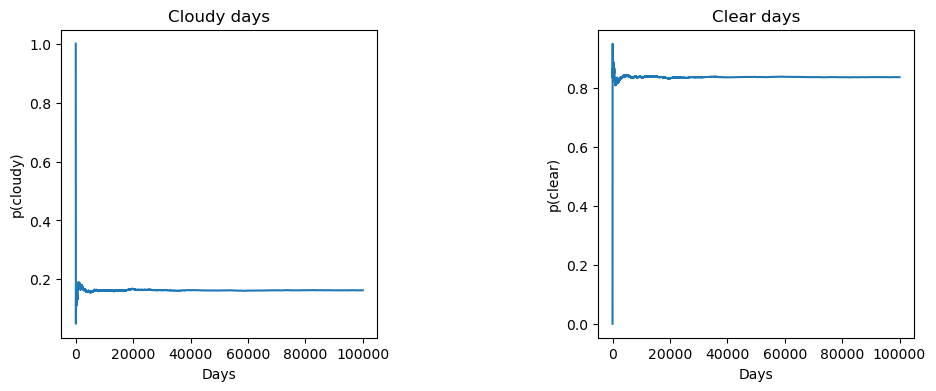

In [5]:
fig, axes = plt.subplots(1,2,figsize=(11,4))
fig.subplots_adjust(wspace=0.7)

axes[0].plot(N,cloud_days/N)
axes[0].set_title('Cloudy days')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('p(cloudy)')

axes[1].plot(N,sun_days/N)
axes[1].set_title('Clear days')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('p(clear)')

plt.show()

Then, we remove the burn-in. Let's try different values of the burn-in.

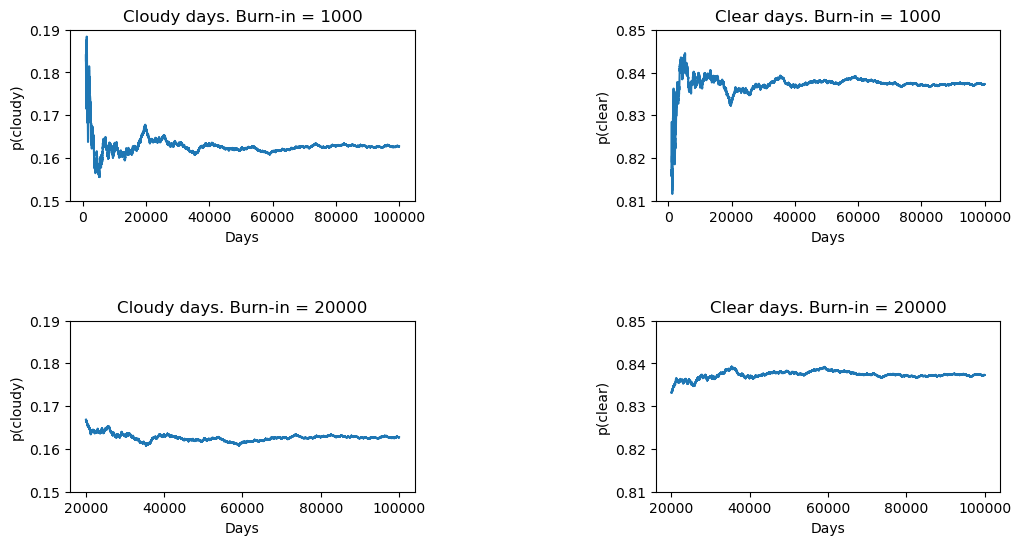

In [6]:
fig, axes = plt.subplots(2,2,figsize=(12,6))
fig.subplots_adjust(wspace=0.7,hspace=0.7)

burn_in = 1000
axes[0,0].plot(N[burn_in:],cloud_days[burn_in:]/N[burn_in:])
axes[0,0].set_title('Cloudy days. Burn-in = '+str(burn_in))
axes[0,0].set_xlabel('Days')
axes[0,0].set_ylabel('p(cloudy)')
axes[0,0].set_ylim(0.15,0.19)

axes[0,1].plot(N[burn_in:],sun_days[burn_in:]/N[burn_in:])
axes[0,1].set_title('Clear days. Burn-in = '+str(burn_in))
axes[0,1].set_xlabel('Days')
axes[0,1].set_ylabel('p(clear)')
axes[0,1].set_ylim(0.81,0.85)


burn_in = 20000
axes[1,0].plot(N[burn_in:],cloud_days[burn_in:]/N[burn_in:])
axes[1,0].set_title('Cloudy days. Burn-in = '+str(burn_in))
axes[1,0].set_xlabel('Days')
axes[1,0].set_ylabel('p(cloudy)')
axes[1,0].set_ylim(0.15,0.19)

axes[1,1].plot(N[burn_in:],sun_days[burn_in:]/N[burn_in:])
axes[1,1].set_title('Clear days. Burn-in = '+str(burn_in))
axes[1,1].set_xlabel('Days')
axes[1,1].set_ylabel('p(clear)')
axes[1,1].set_ylim(0.81,0.85)

plt.show()

Let's plot the two distributions.

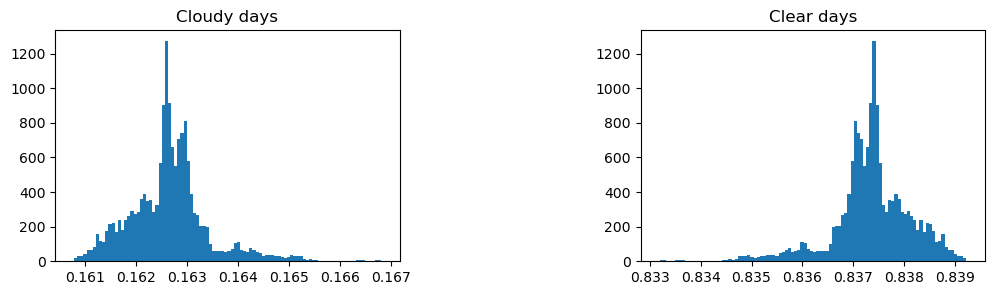

In [7]:
fig, axes = plt.subplots(1,2,figsize=(12,3))
fig.subplots_adjust(wspace=0.7)

axes[0].hist(cloud_days[burn_in:]/N[burn_in:],100,density=True)
axes[0].set_title('Cloudy days')

axes[1].hist(sun_days[burn_in:]/N[burn_in:],100,density=True)
axes[1].set_title('Clear days')

plt.show()

In [8]:
print('Most probable p(clear) : '+str(np.round(np.median(cloud_days[burn_in:]/N[burn_in:]),3))+' +- '+str(np.round(astroML.stats.sigmaG(cloud_days[burn_in:]/N[burn_in:]),3)))
print('Most probable p(Clear) : '+str(np.round(np.median(sun_days[burn_in:]/N[burn_in:]),3))+' +- '+str(np.round(astroML.stats.sigmaG(sun_days[burn_in:]/N[burn_in:]),3)))

Most probable p(clear) : 0.163 +- 0.001
Most probable p(Clear) : 0.837 +- 0.001


# stock market

$bull=0$, $bear=1$, $stagnant=2$

In [9]:
p_bull_bull = 0.9      #p(bull|bull)
p_bear_bull = 0.075    #p(bear|bull)
p_stag_bull = 0.025    #p(stag|bull)

p_bear_bear = 0.8      #p(bear|bear)
p_bull_bear = 0.15     #p(bull|bear)
p_stag_bear = 0.05     #p(stag|bear)

p_stag_stag = 0.5      #p(stag|stag)
p_bear_stag = 0.25     #p(bear|stag)
p_bull_stag = 0.25     #p(bull|stag)

In [10]:
def generate_market(now):
    u = np.random.uniform(0,1,1)
    
    if now == 0:
        if u<p_stag_bull:
            return 2
        elif u<p_bear_bull+p_stag_bull:
            return 1
        else:
            return 0
    
    if now == 1:
        if u<p_stag_bear:
            return 2
        elif u<p_bull_bear+p_stag_bear:
            return 0
        else:
            return 1
    
    if now == 2:
        if u<p_bull_stag:
            return 0
        elif u<p_bull_stag+p_bear_stag:
            return 1
        else:
            return 2

In [11]:
n = np.linspace(1,10**5,10**5,dtype=int)
bull = np.zeros(len(n))
bear = np.zeros(len(n))
stagnant = np.zeros(len(n))

now = np.random.randint(0,3,1)
for i in range(len(n)):
    if now == 0:
        bull[i]=bull[i-1]+1
        bear[i]=bear[i-1]
        stagnant[i]=stagnant[i-1]
    if now == 1:
        bear[i]=bear[i-1]+1
        bull[i]=bull[i-1]
        stagnant[i]=stagnant[i-1]
    if now == 2:
        stagnant[i]=stagnant[i-1]+1
        bull[i]=bull[i-1]
        bear[i]=bear[i-1]
    now = generate_market(now)

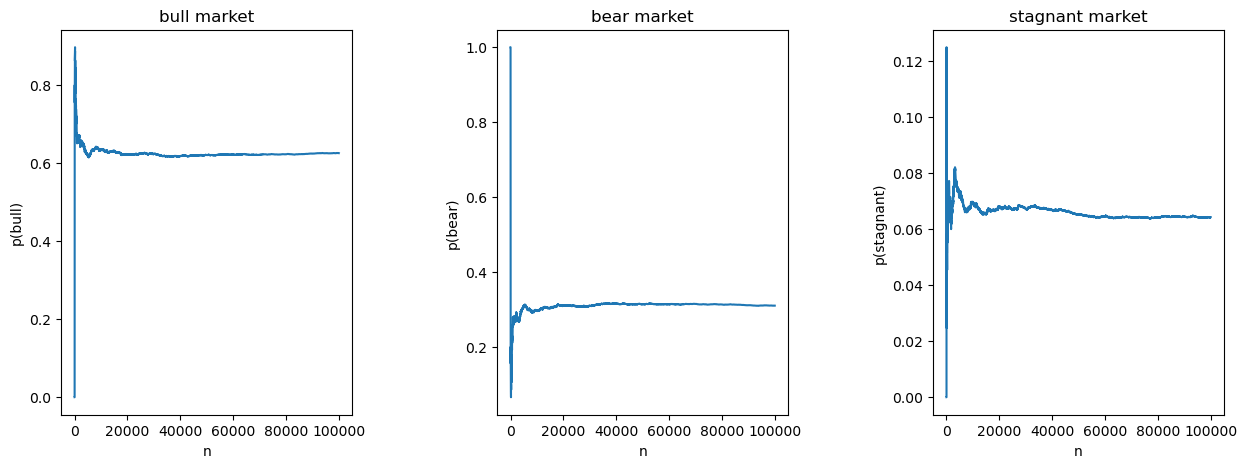

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.subplots_adjust(wspace=0.5)

axes[0].plot(n,bull/n)
axes[0].set_xlabel('n')
axes[0].set_ylabel('p(bull)')
axes[0].set_title('bull market')

axes[1].plot(n,bear/n)
axes[1].set_xlabel('n')
axes[1].set_ylabel('p(bear)')
axes[1].set_title('bear market')

axes[2].plot(n,stagnant/n)
axes[2].set_xlabel('n')
axes[2].set_ylabel('p(stagnant)')
axes[2].set_title('stagnant market')

plt.show()

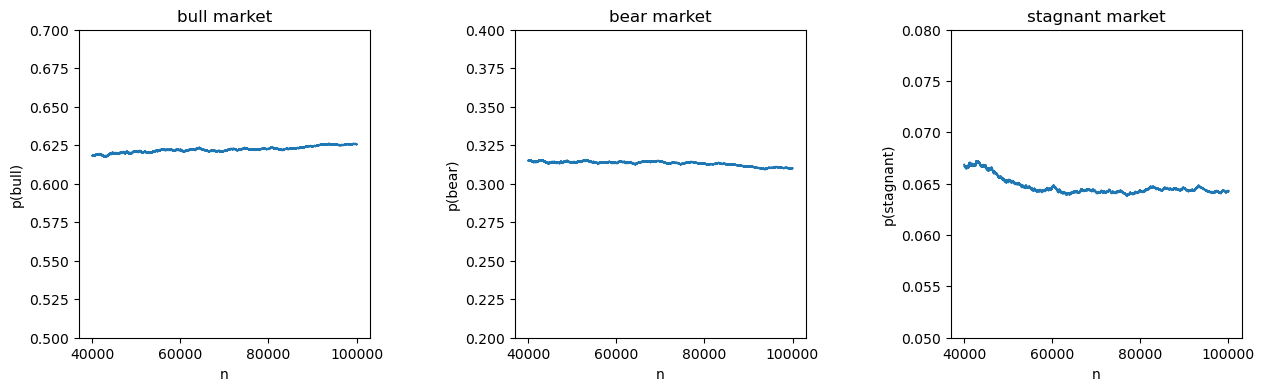

In [16]:
burn = 40000

fig, axes = plt.subplots(1,3, figsize=(15,4))
fig.subplots_adjust(wspace=0.5)

axes[0].plot(n[burn:],bull[burn:]/n[burn:])
axes[0].set_xlabel('n')
axes[0].set_ylabel('p(bull)')
axes[0].set_title('bull market')
axes[0].set_ylim(0.5,0.7)

axes[1].plot(n[burn:],bear[burn:]/n[burn:])
axes[1].set_xlabel('n')
axes[1].set_ylabel('p(bear)')
axes[1].set_title('bear market')
axes[1].set_ylim(0.2,0.4)

axes[2].plot(n[burn:],stagnant[burn:]/n[burn:])
axes[2].set_xlabel('n')
axes[2].set_ylabel('p(stagnant)')
axes[2].set_title('stagnant market')
axes[2].set_ylim(0.05,0.08)

plt.show()

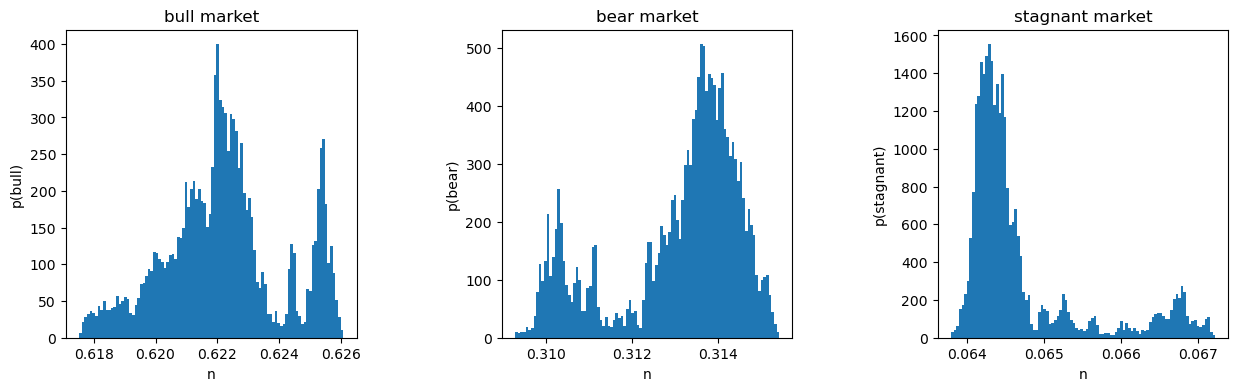

In [17]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
fig.subplots_adjust(wspace=0.5)

axes[0].hist(bull[burn:]/n[burn:],100,density=True)
axes[0].set_xlabel('n')
axes[0].set_ylabel('p(bull)')
axes[0].set_title('bull market')

axes[1].hist(bear[burn:]/n[burn:],100,density=True)
axes[1].set_xlabel('n')
axes[1].set_ylabel('p(bear)')
axes[1].set_title('bear market')

axes[2].hist(stagnant[burn:]/n[burn:],100,density=True)
axes[2].set_xlabel('n')
axes[2].set_ylabel('p(stagnant)')
axes[2].set_title('stagnant market')

plt.show()

In [20]:
print('Most probable p(bull) : '+str(np.round(np.median(bull[burn:]/n[burn:]),3))+' +- '+str(np.round(astroML.stats.sigmaG(bull[burn:]/n[burn:]),3)))
print('Most probable p(bear) : '+str(np.round(np.median(bear[burn:]/n[burn:]),3))+' +- '+str(np.round(astroML.stats.sigmaG(bear[burn:]/n[burn:]),3)))
print('Most probable p(stagnant) : '+str(np.round(np.median(stagnant[burn:]/n[burn:]),4))+' +- '+str(np.round(astroML.stats.sigmaG(stagnant[burn:]/n[burn:]),4)))

Most probable p(bull) : 0.622 +- 0.002
Most probable p(bear) : 0.314 +- 0.001
Most probable p(stagnant) : 0.0644 +- 0.0003
